In [265]:
import numpy as np
import matplotlib.pyplot as plt
import random
from copy import deepcopy

In [266]:
noise_scale = 100
number_of_samples = 50 
x =  25*(np.random.rand(number_of_samples, 1) - 0.5)
y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples, 1) 

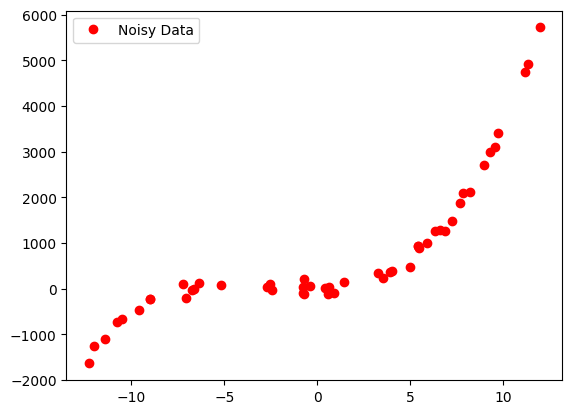

In [267]:
plt.plot(x,y,'ro', label='Noisy Data')
plt.legend()
plt.show()

In [268]:
x = np.array(x).flatten().tolist()
y = np.array(y).flatten().tolist()

## 1. Apply a Polynomial to Dataset

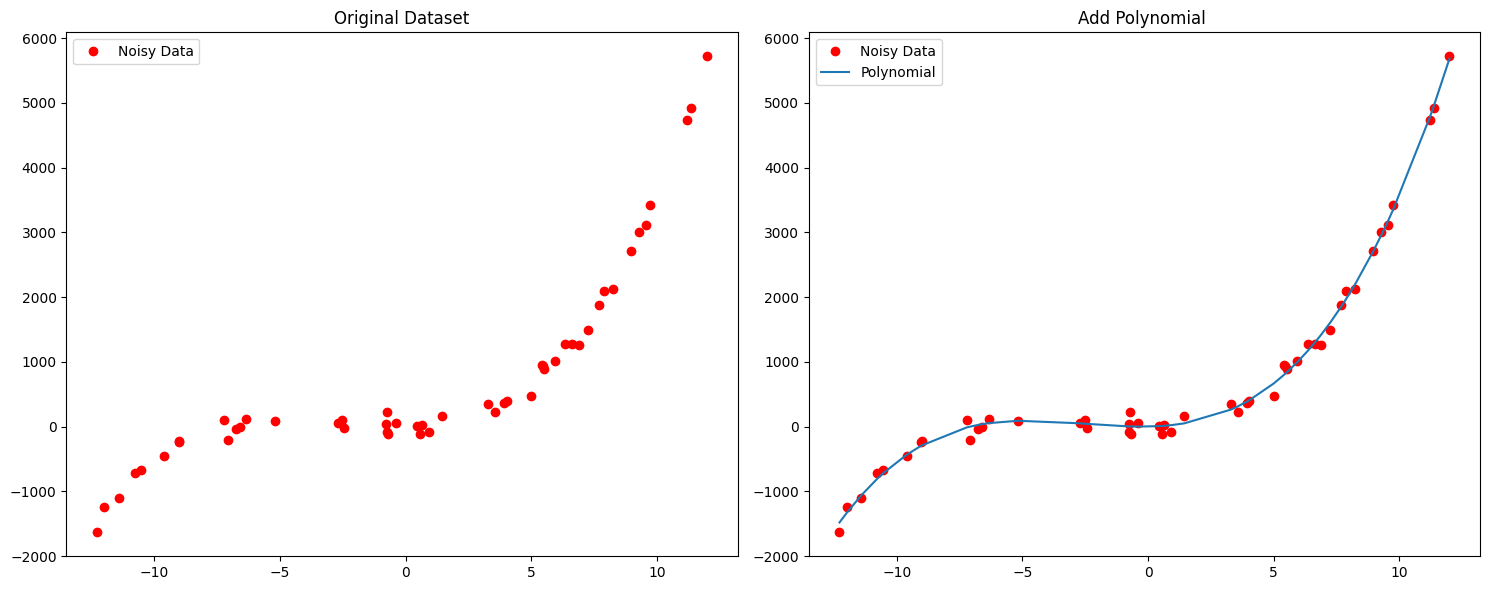

In [269]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax1.plot(x,y, 'ro', label='Noisy Data')
ax1.set_title("Original Dataset")
ax1.legend()

coeff = np.polyfit(x,y,3) 
poly1D = np.poly1d(coeff)
sortx = np.sort(x) 

ax2.plot(x,y, 'ro', label='Noisy Data')
ax2.plot(sortx, poly1D(sortx), label = 'Polynomial') 
ax2.set_title("Add Polynomial ")
ax2.legend()

fig.tight_layout()

--- 

### 2. Implementation using Genetic Algorithm using both mutation and crossover operations

In [270]:
def createPopulation(size):
    chromosomes = []
    for i in range(size): 
        chromosomes.append([random.randint(-20,20) for i in range(4)])
    return chromosomes 

In [271]:
def mutate(individual): 
    mutations = []
    mutations.append(individual)
    for _ in range(9): 
        new = deepcopy(individual)
        rand_idx = random.randrange(len(new))
        rand_num = new[rand_idx]
        rand_float = random.uniform(0.0,2.0)
        
        new_num = rand_num * rand_float
        new[rand_idx] = new_num
        
        mutations.append(new)
    return mutations

In [272]:
def crossover(parent1, parent2): 
    newParent1, newParent2 = [], []
    rand_idx = random.randrange(len(parent1))

    newParent1 = parent1[:rand_idx]+ parent2[rand_idx:]
    newParent2 = parent2[:rand_idx] + parent1[rand_idx:]
    
    return newParent1, newParent2

In [273]:
def cost(i, chromosome): 
    return chromosome[0]*(x[i]**3) + chromosome[1]*(x[i]**2) + chromosome[2]*(x[i])+ chromosome[3]

In [274]:
def fitness(chromosome): 
    badness = 0 
    for i in range(len(x)): 
        pred = cost(i, chromosome)
        yval = y[i]
        badness += (pred - yval)**2

    return (chromosome, round(badness))

In [275]:
def fitnessPopulation(population): 
    bestGenes = []
    for i in range(len(population)): 
        individual = population[i]
        scores = fitness(individual)
        bestGenes.append(scores)
    bestGenes = sorted(bestGenes, key = lambda x: float(x[1]), reverse = False)[:10]
    return bestGenes 

In [276]:
def main(): 
    
    num_generations = 500
    bestGenes = []
    
    population = createPopulation(100)      # Creating starting population 

    for i in range(num_generations): 
        
        new_population = []
         
        bestGenes = fitnessPopulation(population)         
        
        newParents = []
        
        # Adding crossover to parents 
        for k in range(0, len(bestGenes)-1,2): 
            
            parent1, parent2 = crossover(bestGenes[k][0], bestGenes[k+1][0])

            newParents.append(parent1)
            newParents.append(parent2)

        # Adding mutation to cross-over parents 
        for b in range(len(newParents)): 
            
            newGenes = mutate(newParents[b])
            
            # For each new child, adding into new population 
            for j in newGenes: 
                new_population.append(j)
             
        population = deepcopy(new_population)       # Replacing old population with new population using deepcopy()

    return population 

In [277]:
mainFit = main()

In [278]:
new_coeff = fitnessPopulation(mainFit)[0][0]

In [279]:
new_coeff

[1.9802869361503834,
 15.107840460473353,
 7.5891295944192985,
 0.37646480461553294]

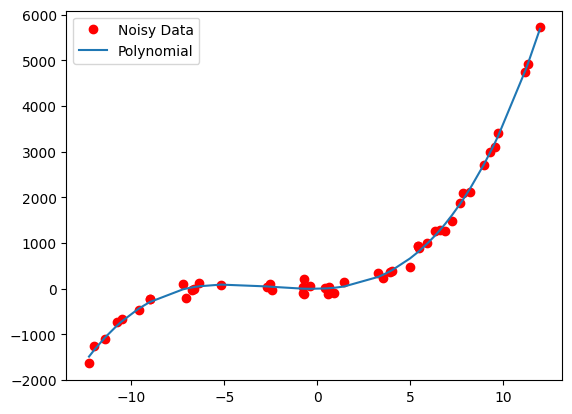

In [280]:
poly1D = np.poly1d(new_coeff)
plt.plot(x,y, 'ro', label = 'Noisy Data')
newSortx = np.sort(x) 
plt.plot(newSortx, poly1D(newSortx), label = 'Polynomial') 
plt.legend()
plt.show()

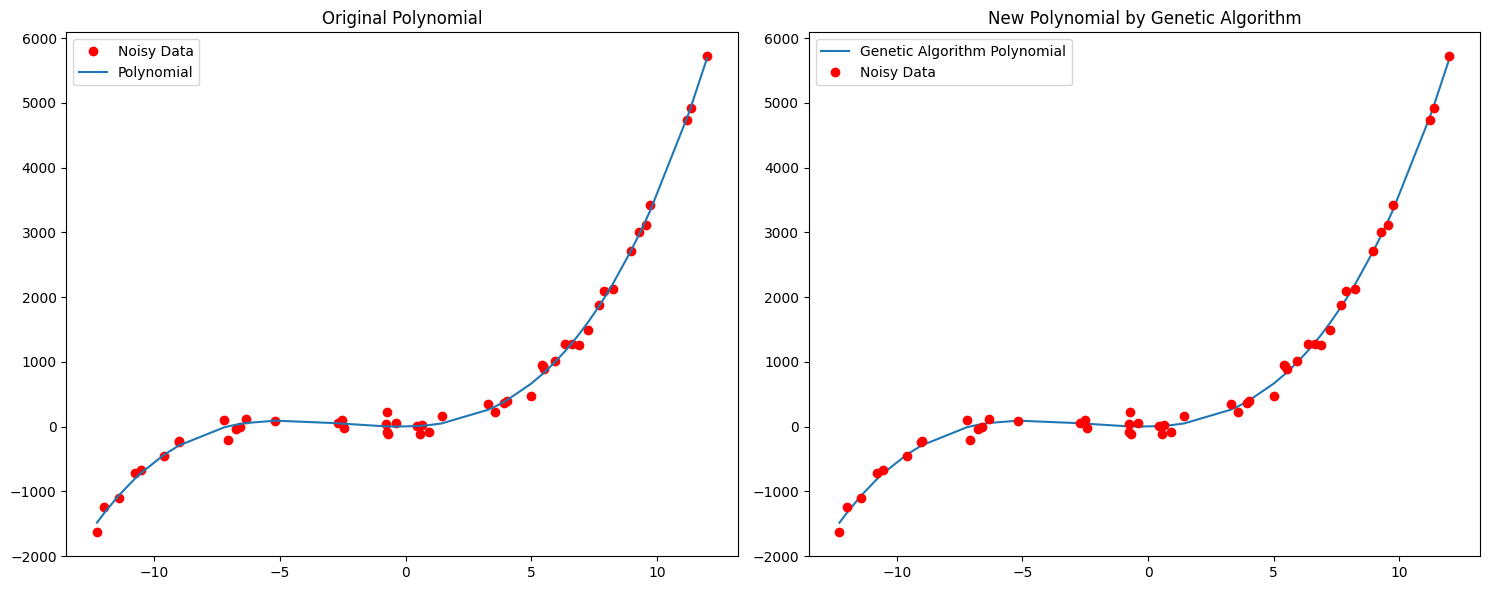

In [281]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax1.plot(x,y, 'ro', label='Noisy Data')
ax1.plot(sortx, poly1D(sortx), label = 'Polynomial')
ax1.set_title("Original Polynomial")
ax1.legend()

ax2.plot(newSortx, poly1D(newSortx), label='Genetic Algorithm Polynomial')
ax2.plot(x,y, 'ro', label='Noisy Data')
ax2.set_title("New Polynomial by Genetic Algorithm")
ax2.legend()
fig.tight_layout()

Using the `polyfit` technique from the NumPy library, which approximates a polynomial curve of degree `n` using least-squares fitting, the first polynomial was produced. Using the evolutionary algorithm optimization method, which looks for the ideal values of the coefficients that minimize the cost function (i.e., mean squared error), the second polynomial was produced.

The initial polynomial of degree 3 was able to capture the broad structure of the data, but it does not fit the data perfectly because there is still a sizable amount of noise. On the other hand, the second polynomial produced via genetic algorithm optimization was better able to fit the data and had less noise. This is because, in contrast to the polynomial fitting method, the genetic algorithm approach actively seeks out the ideal values of the coefficients that minimize the cost function.

In situations where the polynomial order is large or the data is noisy and a more exact fit is needed, the genetic algorithm optimization strategy may generally outperform the polynomial fitting method. The genetic algorithm optimization method, however, can be computationally expensive and may need more rounds to reach the ideal result. A fair approximation of the polynomial function can be obtained, however, using the polynomial fitting method, which is a quicker and easier strategy.